2022-09-29 14:20:32.902276: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-29 14:20:32.980100: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


11490434/11490434 [==============================] - 1s 0us/step
<class 'tuple'> 2
(60000, 28, 28) (10000,)
(10000, 28, 28) (10000,)
[5 0 4 1 9]


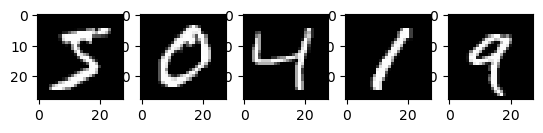

In [1]:
# DNN으로 숫자 손글씨 학습
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist.load_data()
print(type(mnist), len(mnist))

(X_train, y_train), (X_test, y_test) = mnist
print(X_train.shape, y_test.shape)
print(X_test.shape, y_test.shape)

print(y_train[:5])
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap="gray")


In [7]:
# 정규화 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
(X_train, X_test) = (np.float32(X_train)/255, np.float32(X_test)/255)
# 2차원 > 1차원 전환
n_input = 28*28
(X_train, X_test) = (X_train.reshape(-1, n_input), X_test.reshape(-1, n_input))

In [8]:
X_train.shape

(60000, 784)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28*28,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')])
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2022-09-29 14:50:25.164777: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


480/480 [==============================] - 1s 2ms/step - loss: 0.4123 - accuracy: 0.8779 - val_loss: 0.1486 - val_accuracy: 0.9569
Epoch 2/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1683 - accuracy: 0.9528 - val_loss: 0.1114 - val_accuracy: 0.9667
Epoch 3/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9664 - val_loss: 0.0910 - val_accuracy: 0.9721
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9753 - val_loss: 0.0970 - val_accuracy: 0.9709
Epoch 5/10
480/480 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9795 - val_loss: 0.0859 - val_accuracy: 0.9754
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.0525 - accuracy: 0.9843 - val_loss: 0.0828 - val_accuracy: 0.9773
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0846 - val_accuracy: 0.9765
Epoch 8/10
480/48

# CNN 숫자 손글씨

In [15]:
import tensorflow as tf
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() # 손글씨 데이터 로드

#데이터 정규화
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.shape)

# 색상을 저장하기 위한 차원 추가
X_train = X_train[..., tf.newaxis] # ... 은 기존의 데이터를 의미함.
X_test = X_test[..., tf.newaxis]   # tf.newaxis는 새로운 차원을 뜻함  X_train = X_train.reshape(-1, 28, 28, 1) 도 가능 
print("newaxis 이후",X_train.shape)

(60000, 28, 28)
newaxis 이후 (60000, 28, 28, 1)


In [ ]:
X_valid, X_train = X_train[:5000], X_train[5000:]  # 5천, 5만5천개로 valid와 train을 나눔
y_valid, y_train = y_train[:5000], y_train[5000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)), # 마지막 차원 1은 흑백으로 없어도 표현은 흑백이지만 인풋으로 넘겨줄 때 3차원을 요구하기 때문에 위에처럼 newaxis를 통해 추가해줘야 한다.
    tf.keras.layers.MaxPool2D(2, 2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu ), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))